## 📘 Dataset Description :

🌦️ Column-wise Description

* date – This column represents the date and time when the weather data was recorded. Each entry shows an hourly timestamp of the observation.
  
* station_id – This indicates the unique identifier of the weather station where the data was collected. Multiple stations (e.g., STN_1, STN_2, etc.)     are used to capture weather information from different locations.

* temperature – This column shows the air temperature measured in degrees Celsius (°C) at the given time and location.

* humidity – This represents the relative humidity, expressed as a percentage (%), indicating the amount of moisture present in the air.

* pressure – This column contains the atmospheric pressure readings measured in hectopascals (hPa), which help in understanding weather stability and     forecasting.

* wind_speed – This indicates the speed of the wind at the time of observation, typically measured in kilometers per hour (km/h) or meters per second     (m/s).

* wind_direction – This represents the direction from which the wind is blowing, measured in degrees (°) on a 0–360 scale, where 0° indicates north.

* precipitation – This column shows the amount of rainfall or other forms of precipitation (such as snow or drizzle), measured in millimeters (mm).

* cloud_cover – This represents the percentage of the sky covered by clouds, ranging from 0% (clear sky) to 100% (fully cloudy).

* visibility – This column shows the distance one can see clearly, measured in kilometers (km). Low values indicate fog or heavy rain.

* weather_label – This is the categorical label describing the overall weather condition for that record. Possible values include Sunny, Cloudy, Rainy,   Foggy, and Storm. It can be used as the target variable for classification tasks.

## Importing required Libraries :

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)




import pickle as pkl

## Load Dataset 

In [5]:
weather = pd.read_csv('weather_prediction_dataset.csv')
weather

,date,station_id,temperature,humidity,pressure,wind_speed,wind_direction,precipitation,cloud_cover,visibility,weather_label
0,1/1/2024 0:00,STN_4,30.6,36,1014.4,19.3,74,1.15,74,2.2,Cloudy
1,1/1/2024 1:00,STN_3,32.2,46,1018.8,12.0,351,2.74,96,15.5,Cloudy
2,1/1/2024 2:00,STN_1,15.4,81,998.3,8.9,300,7.47,7,17.4,Rainy
3,1/1/2024 3:00,STN_4,29.0,51,1007.6,16.3,44,0.24,44,4.7,Sunny
4,1/1/2024 4:00,STN_5,31.8,23,1025.9,25.3,332,0.20,77,8.2,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...
995,2/11/2024 11:00,STN_1,41.5,69,1030.0,33.8,246,1.45,87,15.2,Storm
996,2/11/2024 12:00,STN_2,35.1,95,1006.7,7.7,310,2.96,94,1.3,Foggy
997,2/11/2024 13:00,STN_3,32.3,81,998.6,3.7,215,1.21,73,2.8,Cloudy
998,2/11/2024 14:00,STN_3,29.5,52,1014.4,8.0,19,1.86,69,1.3,Cloudy


## Statistical summary of the Dataset

In [7]:
weather.describe()

,temperature,humidity,pressure,wind_speed,wind_direction,precipitation,cloud_cover,visibility
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.620100,59.509000,1012.899300,20.223800,180.779000,2.043780,50.242000,10.586000
std,6.984721,22.326002,9.526019,11.461982,105.854945,2.100748,28.495323,5.392605
min,4.900000,20.000000,986.000000,0.100000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,41.000000,1006.600000,10.200000,87.750000,0.567500,26.000000,6.075000
50%,24.200000,59.000000,1012.700000,20.400000,184.000000,1.340000,52.000000,10.750000
75%,29.400000,78.000000,1019.325000,29.725000,273.000000,2.890000,75.000000,15.025000
max,49.600000,99.000000,1038.900000,40.000000,359.000000,15.300000,99.000000,20.000000


In [8]:
## Find the unique values in all columns
for col in weather.columns:
    print(f'{[col]} :- {weather[col].unique()}')

['date'] :- ['1/1/2024 0:00' '1/1/2024 1:00' '1/1/2024 2:00' '1/1/2024 3:00'
 '1/1/2024 4:00' '1/1/2024 5:00' '1/1/2024 6:00' '1/1/2024 7:00'
 '1/1/2024 8:00' '1/1/2024 9:00' '1/1/2024 10:00' '1/1/2024 11:00'
 '1/1/2024 12:00' '1/1/2024 13:00' '1/1/2024 14:00' '1/1/2024 15:00'
 '1/1/2024 16:00' '1/1/2024 17:00' '1/1/2024 18:00' '1/1/2024 19:00'
 '1/1/2024 20:00' '1/1/2024 21:00' '1/1/2024 22:00' '1/1/2024 23:00'
 '1/2/2024 0:00' '1/2/2024 1:00' '1/2/2024 2:00' '1/2/2024 3:00'
 '1/2/2024 4:00' '1/2/2024 5:00' '1/2/2024 6:00' '1/2/2024 7:00'
 '1/2/2024 8:00' '1/2/2024 9:00' '1/2/2024 10:00' '1/2/2024 11:00'
 '1/2/2024 12:00' '1/2/2024 13:00' '1/2/2024 14:00' '1/2/2024 15:00'
 '1/2/2024 16:00' '1/2/2024 17:00' '1/2/2024 18:00' '1/2/2024 19:00'
 '1/2/2024 20:00' '1/2/2024 21:00' '1/2/2024 22:00' '1/2/2024 23:00'
 '1/3/2024 0:00' '1/3/2024 1:00' '1/3/2024 2:00' '1/3/2024 3:00'
 '1/3/2024 4:00' '1/3/2024 5:00' '1/3/2024 6:00' '1/3/2024 7:00'
 '1/3/2024 8:00' '1/3/2024 9:00' '1/3/2024 10:00' 

## Check null value in the data

In [10]:
weather.isnull().sum()

date              0
station_id        0
temperature       0
humidity          0
pressure          0
wind_speed        0
wind_direction    0
precipitation     0
cloud_cover       0
visibility        0
weather_label     0
dtype: int64

## Add 'Hour' columns in the dataset

In [12]:
weather["date"] = pd.to_datetime(weather["date"], errors="coerce", dayfirst=True)


In [13]:
weather['Date']= weather['date'].dt.date
weather['Time']= weather['date'].dt.time

In [14]:
weather["Hour"] = pd.to_datetime(weather["Time"], errors="coerce",format='%H:%M:%S').dt.hour

In [15]:
weather['Hour']

0       0.0
1       1.0
2       2.0
3       3.0
4       4.0
       ... 
995    11.0
996    12.0
997    13.0
998    14.0
999    15.0
Name: Hour, Length: 1000, dtype: float64

## Drop unwanted columns in the in the dataset

In [17]:
weather.drop(columns=['Date','Time','date','station_id'],axis=1,inplace=True)

In [18]:
weather

,temperature,humidity,pressure,wind_speed,wind_direction,precipitation,cloud_cover,visibility,weather_label,Hour
0,30.6,36,1014.4,19.3,74,1.15,74,2.2,Cloudy,0.0
1,32.2,46,1018.8,12.0,351,2.74,96,15.5,Cloudy,1.0
2,15.4,81,998.3,8.9,300,7.47,7,17.4,Rainy,2.0
3,29.0,51,1007.6,16.3,44,0.24,44,4.7,Sunny,3.0
4,31.8,23,1025.9,25.3,332,0.20,77,8.2,Cloudy,4.0
...,...,...,...,...,...,...,...,...,...,...
995,41.5,69,1030.0,33.8,246,1.45,87,15.2,Storm,11.0
996,35.1,95,1006.7,7.7,310,2.96,94,1.3,Foggy,12.0
997,32.3,81,998.6,3.7,215,1.21,73,2.8,Cloudy,13.0
998,29.5,52,1014.4,8.0,19,1.86,69,1.3,Cloudy,14.0


In [19]:
for col in weather.columns:
    print(f'{[col]} :- {weather[col].unique()}')

['temperature'] :- [30.6 32.2 15.4 29.  31.8 13.6 20.8 12.  27.3 25.4 22.4 34.4 19.2 21.1
 15.2 26.2 20.7 21.6 33.3 23.5 21.9 17.4 28.8 33.6 19.1 20.4 25.5 26.9
 24.8 14.  38.7 24.7 30.5 14.4 22.  32.4 26.6 25.8  6.6 22.5 32.7 39.
 22.6 30.3 19.7 29.5 20.3  6.7 21.3 24.5 13.8 24.6 19.3 29.2 18.9 17.9
 18.8 28.9 22.2 36.7 17.8 27.1 37.8 22.7 16.2 23.8 15.3 36.5 19.  31.4
 40.1 32.6 49.6 24.4 13.4 30.1 18.4  9.1 25.2 16.5 14.3  7.4 25.9 23.1
 15.1 19.5 18.6 37.  22.3 12.5 46.1 14.1 26.4 26.1 29.4 25.  17.7 10.
 17.  31.  17.1 20.1 14.6 12.9 32.5 21.5 24.  27.  23.6 29.9 38.1 18.
 27.7 23.3 18.1 40.   5.5 17.5 18.7 31.3 20.2 26.  33.2 23.9 23.2 25.6
 28.1 28.6 37.7 28.  36.4 21.4 19.6 20.  35.2 27.9 14.5 19.4 15.6 22.1
 28.3  8.5 30.9 18.2 28.4 26.3 28.7 31.5 24.2 33.7 16.7 29.8 15.5 16.4
 34.  26.7 18.3 17.2 10.9 37.5 25.1 36.3 33.8 35.  35.7 19.8 34.1 27.6
 18.5 21.  35.4 36.  13.  21.2 26.5 30.  16.3 11.3  5.8 27.4 31.1 20.5
 44.4 25.7 28.2 25.3 31.6 32.  28.5 14.2 16.6 21.8 21.7 26.8 

## Find Min and max Value of all columns

In [21]:
for col in weather.columns:
    print(f'{[col]} :- {weather[col].min()}')
    print(f'{[col]} :- {weather[col].max()}')

['temperature'] :- 4.9
['temperature'] :- 49.6
['humidity'] :- 20
['humidity'] :- 99
['pressure'] :- 986.0
['pressure'] :- 1038.9
['wind_speed'] :- 0.1
['wind_speed'] :- 40.0
['wind_direction'] :- 0
['wind_direction'] :- 359
['precipitation'] :- 0.0
['precipitation'] :- 15.3
['cloud_cover'] :- 0
['cloud_cover'] :- 99
['visibility'] :- 1.0
['visibility'] :- 20.0
['weather_label'] :- Cloudy
['weather_label'] :- Sunny
['Hour'] :- 0.0
['Hour'] :- 23.0


## Give the Information about the Data

In [23]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature     1000 non-null   float64
 1   humidity        1000 non-null   int64  
 2   pressure        1000 non-null   float64
 3   wind_speed      1000 non-null   float64
 4   wind_direction  1000 non-null   int64  
 5   precipitation   1000 non-null   float64
 6   cloud_cover     1000 non-null   int64  
 7   visibility      1000 non-null   float64
 8   weather_label   1000 non-null   object 
 9   Hour            544 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 78.3+ KB


## Remove Null value in the data

In [25]:
weather.isnull().sum()

temperature         0
humidity            0
pressure            0
wind_speed          0
wind_direction      0
precipitation       0
cloud_cover         0
visibility          0
weather_label       0
Hour              456
dtype: int64

In [26]:
weather['Hour']=weather['Hour'].fillna(weather['Hour'].mode()[0])

In [27]:
weather.isnull().sum()

temperature       0
humidity          0
pressure          0
wind_speed        0
wind_direction    0
precipitation     0
cloud_cover       0
visibility        0
weather_label     0
Hour              0
dtype: int64

## Label Encoding :

In [29]:
weather['weather_label'].unique()

array(['Cloudy', 'Rainy', 'Sunny', 'Foggy', 'Storm'], dtype=object)

In [30]:
labelencoding = LabelEncoder()

In [31]:
label_data = labelencoding.fit_transform(weather['weather_label'])
label_data

array([0, 0, 2, 4, 0, 2, 4, 0, 0, 4, 0, 4, 4, 0, 1, 0, 4, 4, 4, 0, 4, 0,
       4, 4, 4, 4, 4, 4, 0, 3, 2, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4,
       4, 4, 4, 0, 2, 4, 0, 4, 3, 3, 4, 0, 4, 4, 4, 0, 4, 4, 0, 4, 1, 1,
       4, 0, 0, 0, 4, 0, 0, 4, 4, 2, 4, 4, 0, 4, 0, 0, 0, 4, 4, 4, 3, 4,
       4, 0, 0, 4, 4, 0, 4, 2, 4, 4, 4, 0, 3, 4, 2, 0, 0, 4, 2, 4, 0, 3,
       4, 0, 4, 2, 4, 1, 0, 4, 0, 3, 4, 0, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 0, 2, 0, 4, 4, 4, 4, 0,
       4, 0, 4, 4, 0, 4, 4, 0, 4, 0, 4, 4, 0, 4, 4, 4, 0, 1, 4, 4, 1, 0,
       0, 4, 3, 4, 0, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4,
       0, 4, 4, 0, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 2, 0, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 0, 0, 4, 1, 4, 0, 2, 4, 4, 4, 4,
       4, 0, 4, 1, 4, 0, 4, 4, 0, 4, 4, 4, 0, 4, 0, 3, 0, 4, 4, 0, 4, 4,
       4, 0, 0, 4, 4, 4, 4, 4, 0, 0, 4, 4, 3, 4, 4, 4, 4, 4, 0, 0, 4, 0,
       4, 4, 2, 0, 4, 4, 2, 0, 3, 0, 0, 4, 0, 0, 0,

In [32]:
labelencoding.inverse_transform([4])

array(['Sunny'], dtype=object)

In [33]:
weather['weather_label']=label_data

## Convert x and y data format.

In [35]:
X = weather.drop('weather_label',axis=1)
y = weather['weather_label']

## Spitting training and test dataset.

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [38]:
X_train

,temperature,humidity,pressure,wind_speed,wind_direction,precipitation,cloud_cover,visibility,Hour
29,26.9,43,1007.3,32.6,21,4.04,72,14.5,5.0
535,18.8,37,1022.3,18.1,105,2.53,9,14.7,0.0
695,23.3,94,1020.4,16.0,301,0.97,90,3.6,0.0
557,22.0,71,1011.0,18.0,10,2.34,30,4.7,0.0
836,33.3,96,1016.2,10.5,90,10.13,19,9.9,20.0
...,...,...,...,...,...,...,...,...,...
106,32.2,96,1014.2,20.9,12,3.46,80,2.7,10.0
270,19.0,74,1031.4,26.0,0,1.34,52,16.5,6.0
860,37.1,49,1002.2,35.1,55,2.24,62,17.3,20.0
435,9.1,68,1018.0,2.7,332,0.41,40,19.4,0.0


In [39]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [40]:
# Save the fitted scaler object
pkl.dump(scaler, open('weather_scaler.pkl', 'wb')) 
print("Scaler object saved successfully as weather_scaler.pkl")

Scaler object saved successfully as weather_scaler.pkl


## Imbalanced Data :

In [42]:
print("Before SMOTE:", y_train.value_counts())

Before SMOTE: weather_label
4    442
0    247
2     52
3     41
1     18
Name: count, dtype: int64


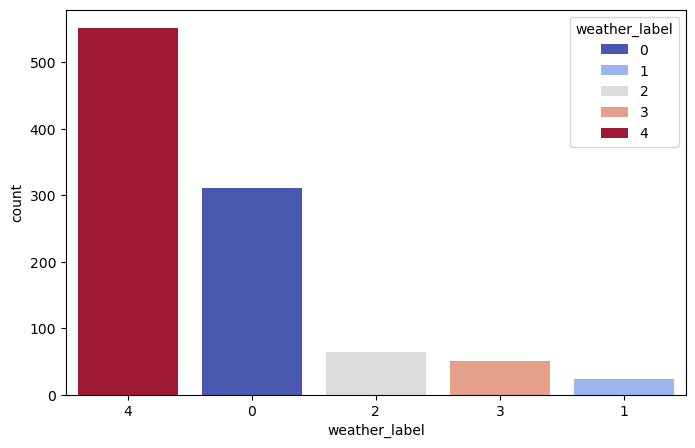

In [43]:
plt.figure(figsize=(8,5))

sns.countplot(x='weather_label',hue='weather_label',data=weather,
              palette='coolwarm',order=weather['weather_label'].value_counts().index,)
plt.show()

## Balance data using SMOTE Analysis 

In [45]:
# Separate features (X) and target (y)
X = weather.drop('weather_label', axis=1)
y = weather['weather_label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_bal.value_counts())


After SMOTE: weather_label
3    442
4    442
1    442
2    442
0    442
Name: count, dtype: int64


## Comparison between Balanced and Unbalanced Dataset.

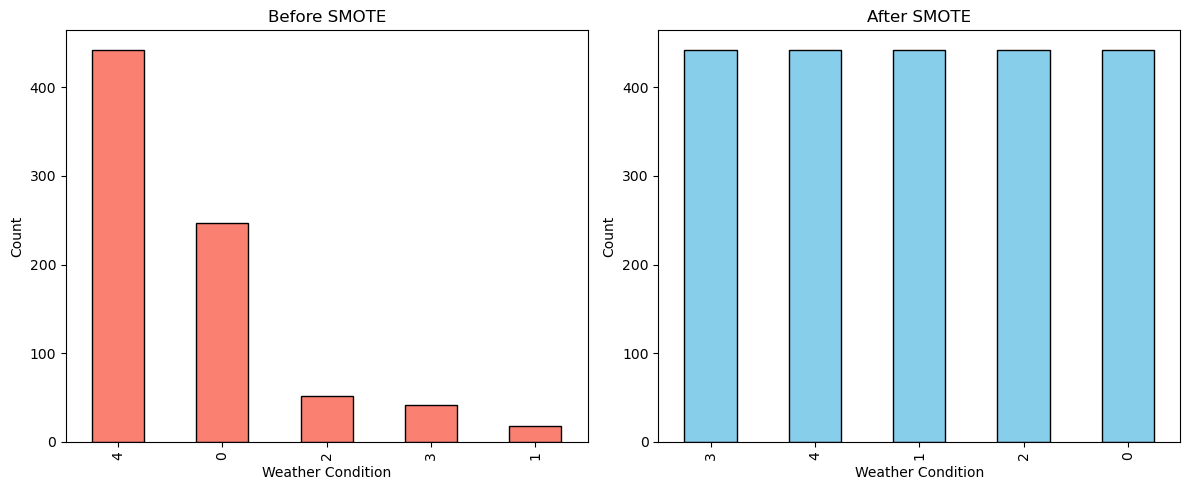

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Before SMOTE
y_train.value_counts().plot( kind='bar', color='salmon', edgecolor='black', ax=axes[0])
axes[0].set_title('Before SMOTE')
axes[0].set_xlabel('Weather Condition')
axes[0].set_ylabel('Count')

# After SMOTE
y_train_bal.value_counts().plot(
    kind='bar', color='skyblue', edgecolor='black', ax=axes[1]
)
axes[1].set_title('After SMOTE')
axes[1].set_xlabel('Weather Condition')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


## Use Standard scaler for making data in a same range.

In [49]:
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)


## Appy :  Logistic Regression Model.

In [51]:
weather.head()

,temperature,humidity,pressure,wind_speed,wind_direction,precipitation,cloud_cover,visibility,weather_label,Hour
0,30.6,36,1014.4,19.3,74,1.15,74,2.2,0,0.0
1,32.2,46,1018.8,12.0,351,2.74,96,15.5,0,1.0
2,15.4,81,998.3,8.9,300,7.47,7,17.4,2,2.0
3,29.0,51,1007.6,16.3,44,0.24,44,4.7,4,3.0
4,31.8,23,1025.9,25.3,332,0.20,77,8.2,0,4.0


In [52]:
print('X_training',X_train.shape)
print('X_testing',X_test.shape)

print('y_training',y_train.shape)
print('y_testing',y_test.shape)


X_training (800, 9)
X_testing (200, 9)
y_training (800,)
y_testing (200,)


## Prepare Logistic regression Model.

In [54]:
model = LogisticRegression()

In [55]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Predict the model accuracy.

In [57]:
y_pred = model.predict(X_test)

In [58]:
acc =accuracy_score(y_test,y_pred)
print('Accuracy : ' ,acc)

Accuracy :  0.9


In [59]:
model.score(X_train,y_train)

0.90625

## Apply : Random Forest Model

In [61]:
random_forest = RandomForestClassifier()

In [62]:
random_forest.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Predict the model accuracy.

In [64]:
y_pred_rf = random_forest.predict(X_test)

In [65]:
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy : ',acc_rf)

Accuracy :  0.97


In [66]:
random_forest.score(X_train,y_train)

1.0

## “Overall, the Random Forest model performed better than Logistic Regression.”

## Histogram

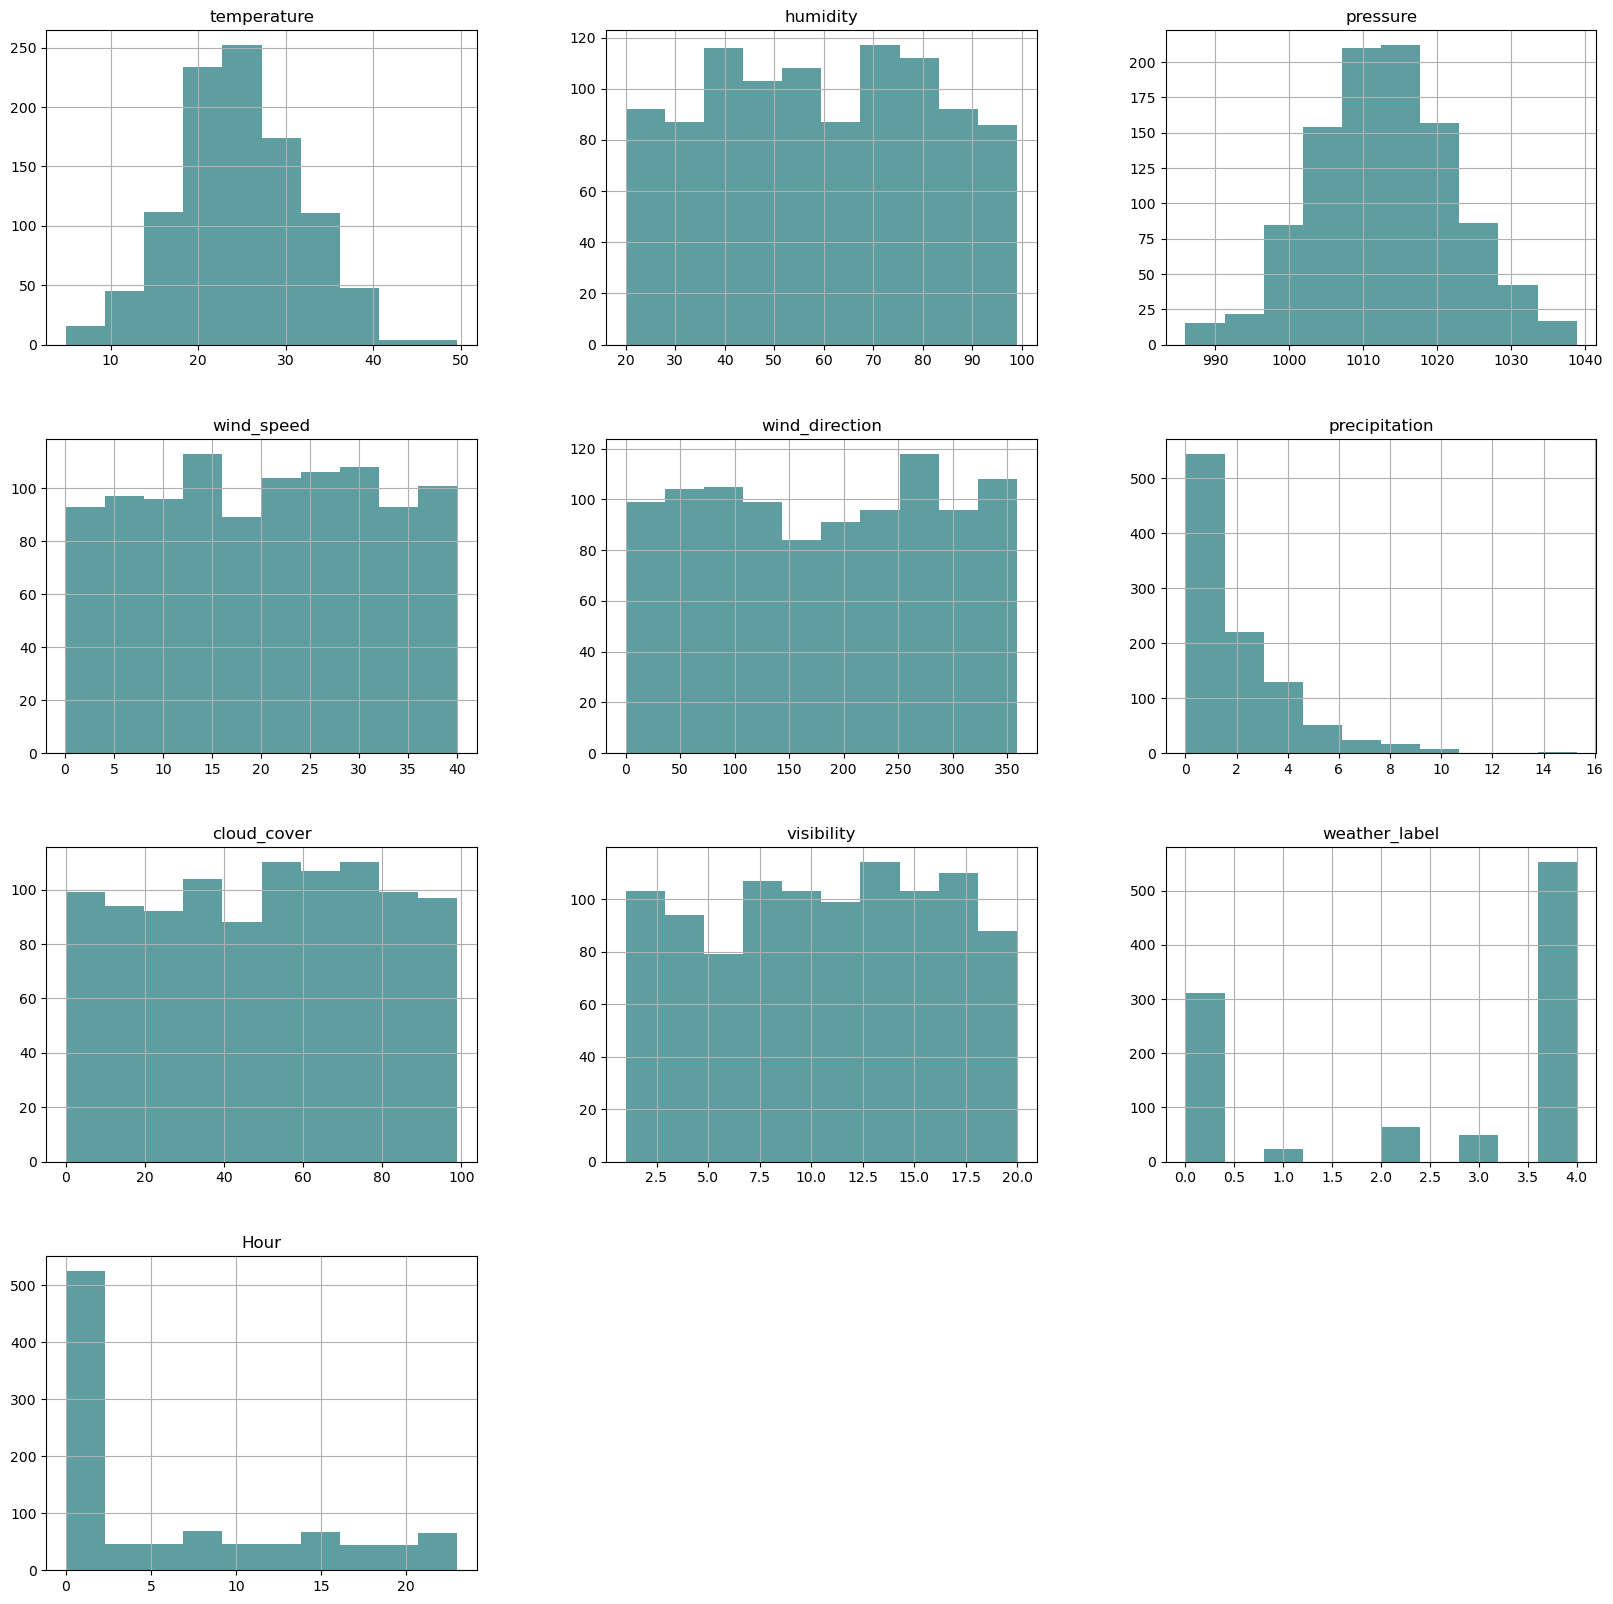

In [69]:
data_hist_plot = weather.hist(figsize = (20,20), color = "#5F9EA0") # Histogram 

## All columns Histogram.
* Temperature: Shows how often different temperatures happen.
* Humidity: Tells how many days were dry or humid.
* Pressure: Shows if air pressure was mostly high or low.
* Wind Speed: Tells if the wind was usually slow or fast.
* Wind Direction: Shows from which direction the wind mostly came.
* Precipitation: Tells how many days had rain and how heavy it was.
* Cloud Cover: Shows how often the sky was cloudy or clear.
* Visibility: Tells if the weather was mostly clear or foggy.
* Hour: Shows at what time of day most data was collected.



## Save model for streamlit app using pickle.

In [72]:
## Saving the trained model
filename ='weather_model.sav'
pkl.dump(model,open(filename,'wb'))

print('Model Saved successfully')

Model Saved successfully
